# Analisis Data Loan Eligibility 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [2]:
df = pd.read_csv('[BRI] Loan Eligibility Train Data.csv', low_memory = False)
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df_val = pd.read_csv('[BRI] Loan Eligibility Validation Data.csv', low_memory = False)
df_val.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


## Cleansing

In [4]:
#cek missing value
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
#menghapus data missing
df.dropna(axis=0, inplace= True)

In [6]:
#cek missing value
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df.shape

(480, 13)

In [8]:
# drop Loan ID

df = df.drop(columns=['Loan_ID'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


#  Deskriptif Data

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [11]:
df_columns = df.columns # assign to a variable
df_columns  

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
Y = df['Loan_Status']
X = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
X_cat = df[['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
X_num = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

In [13]:
print("Deskriprif Gender  : ")
df['Gender'].value_counts(normalize= True)

Deskriprif Gender  : 


Male      0.820833
Female    0.179167
Name: Gender, dtype: float64

In [14]:
print("Deskriprif Married  : ")
df['Married'].value_counts(normalize= True)

Deskriprif Married  : 


Yes    0.647917
No     0.352083
Name: Married, dtype: float64

In [15]:
print("Deskriprif Dependents  : ")
df['Dependents'].value_counts(normalize= True)

Deskriprif Dependents  : 


0     0.570833
2     0.177083
1     0.166667
3+    0.085417
Name: Dependents, dtype: float64

In [16]:
print("Deskriprif Education  : ")
df['Education'].value_counts(normalize= True)

Deskriprif Education  : 


Graduate        0.797917
Not Graduate    0.202083
Name: Education, dtype: float64

In [17]:
print("Self_Employed  : ")
df['Self_Employed'].value_counts(normalize= True)

Self_Employed  : 


No     0.8625
Yes    0.1375
Name: Self_Employed, dtype: float64

In [18]:
print("Property_Area' : ")
df['Property_Area'].value_counts(normalize= True)

Property_Area' : 


Semiurban    0.397917
Urban        0.312500
Rural        0.289583
Name: Property_Area, dtype: float64

In [19]:
print('Loan_Status   : ' )
df['Loan_Status'].value_counts(normalize= True)

Loan_Status   : 


Y    0.691667
N    0.308333
Name: Loan_Status, dtype: float64

### Encode Labels

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:

# Encode untuk variabel kategorik 
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['Married'] = LabelEncoder().fit_transform(df['Married'])
df['Dependents'] = LabelEncoder().fit_transform(df['Dependents'])
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Self_Employed'] = LabelEncoder().fit_transform(df['Self_Employed'])
df['Property_Area'] = LabelEncoder().fit_transform(df['Property_Area'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y


In [22]:
df.Loan_Status = df.Loan_Status.replace({"Y": 0, "N" : 1})

## Standardize

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
#Standardize untuk df
df['ApplicantIncome'] = StandardScaler().fit(df[['ApplicantIncome']]).transform(df[['ApplicantIncome']])
df['CoapplicantIncome'] = StandardScaler().fit(df[['CoapplicantIncome']]).transform(df[['CoapplicantIncome']])
df['LoanAmount'] = StandardScaler().fit(df[['LoanAmount']]).transform(df[['LoanAmount']])
df['Loan_Amount_Term'] = StandardScaler().fit(df[['Loan_Amount_Term']]).transform(df[['Loan_Amount_Term']])
df['Credit_History'] = StandardScaler().fit(df[['Credit_History']]).transform(df[['Credit_History']])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,-0.137970,-0.027952,-0.208089,0.275542,0.413197,0,1
2,1,1,0,0,1,-0.417536,-0.604633,-0.979001,0.275542,0.413197,2,0
3,1,1,0,1,0,-0.491180,0.297100,-0.307562,0.275542,0.413197,2,0
4,1,0,0,0,0,0.112280,-0.604633,-0.046446,0.275542,0.413197,2,0
5,1,1,2,0,1,0.009319,0.999978,1.520245,0.275542,0.413197,2,0


### Visualisasi Data

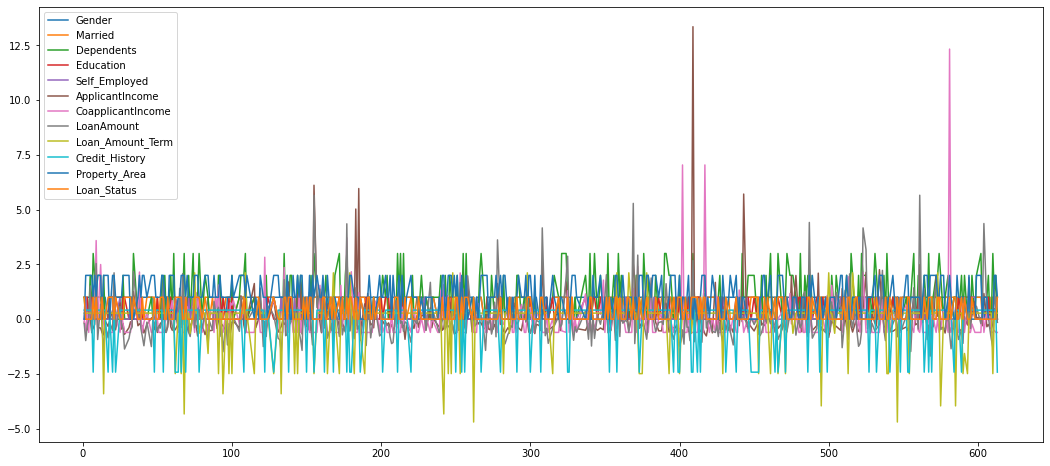

In [25]:
df.plot(figsize=(18, 8))
plt.show()

#  Diagnotics

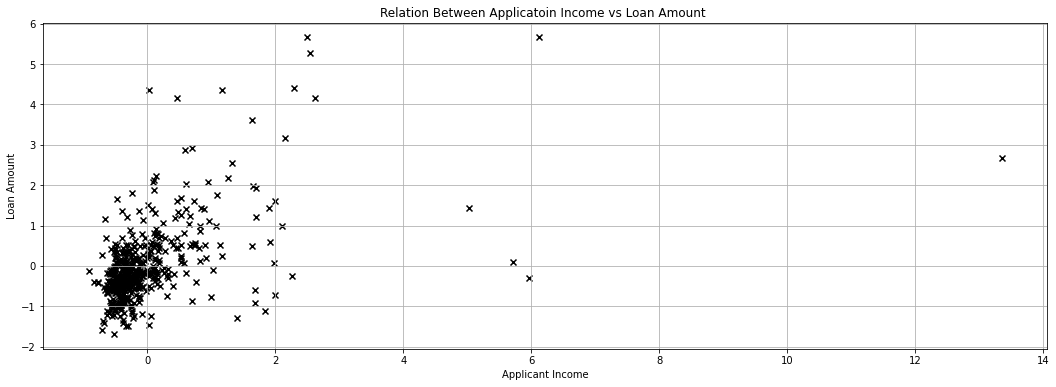

In [26]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

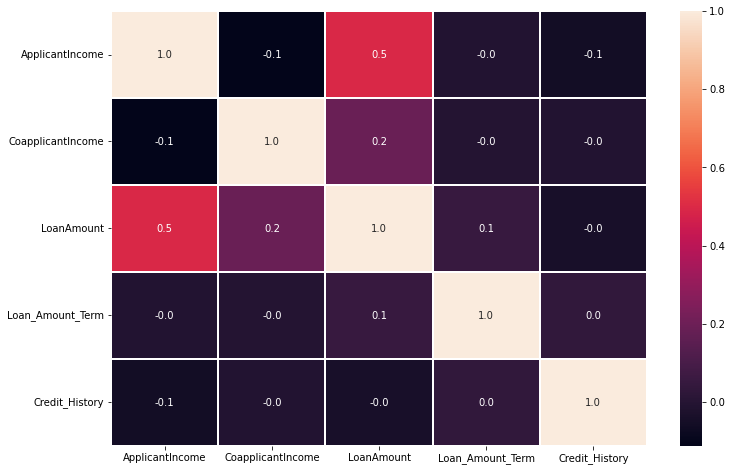

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(X_num.corr(method = 'pearson'), annot=True, fmt='.1f', linewidths=.1)
plt.show()

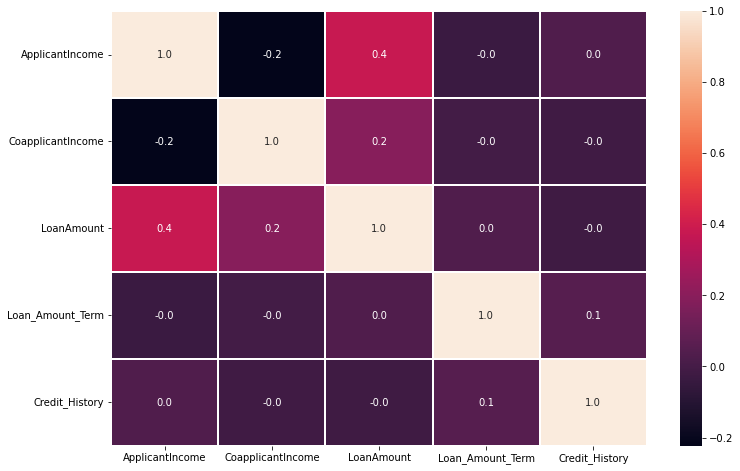

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(X_cat.corr(method = 'kendall'), annot=True, fmt='.1f', linewidths=.1)
plt.show()

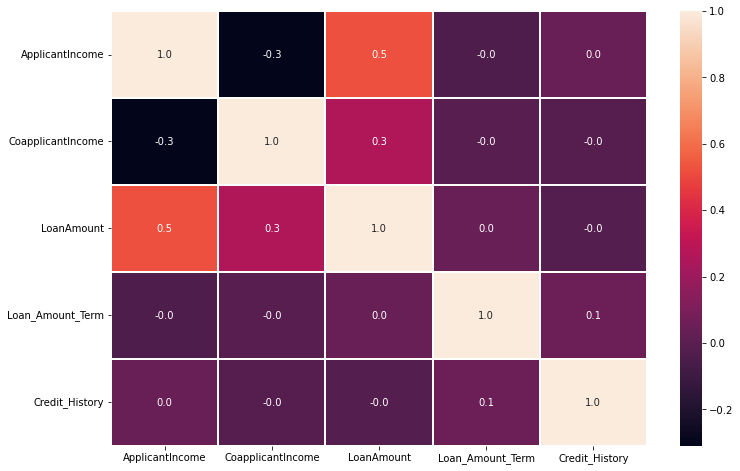

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(method = 'spearman'), annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [30]:
Y = df['Loan_Status']
X = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

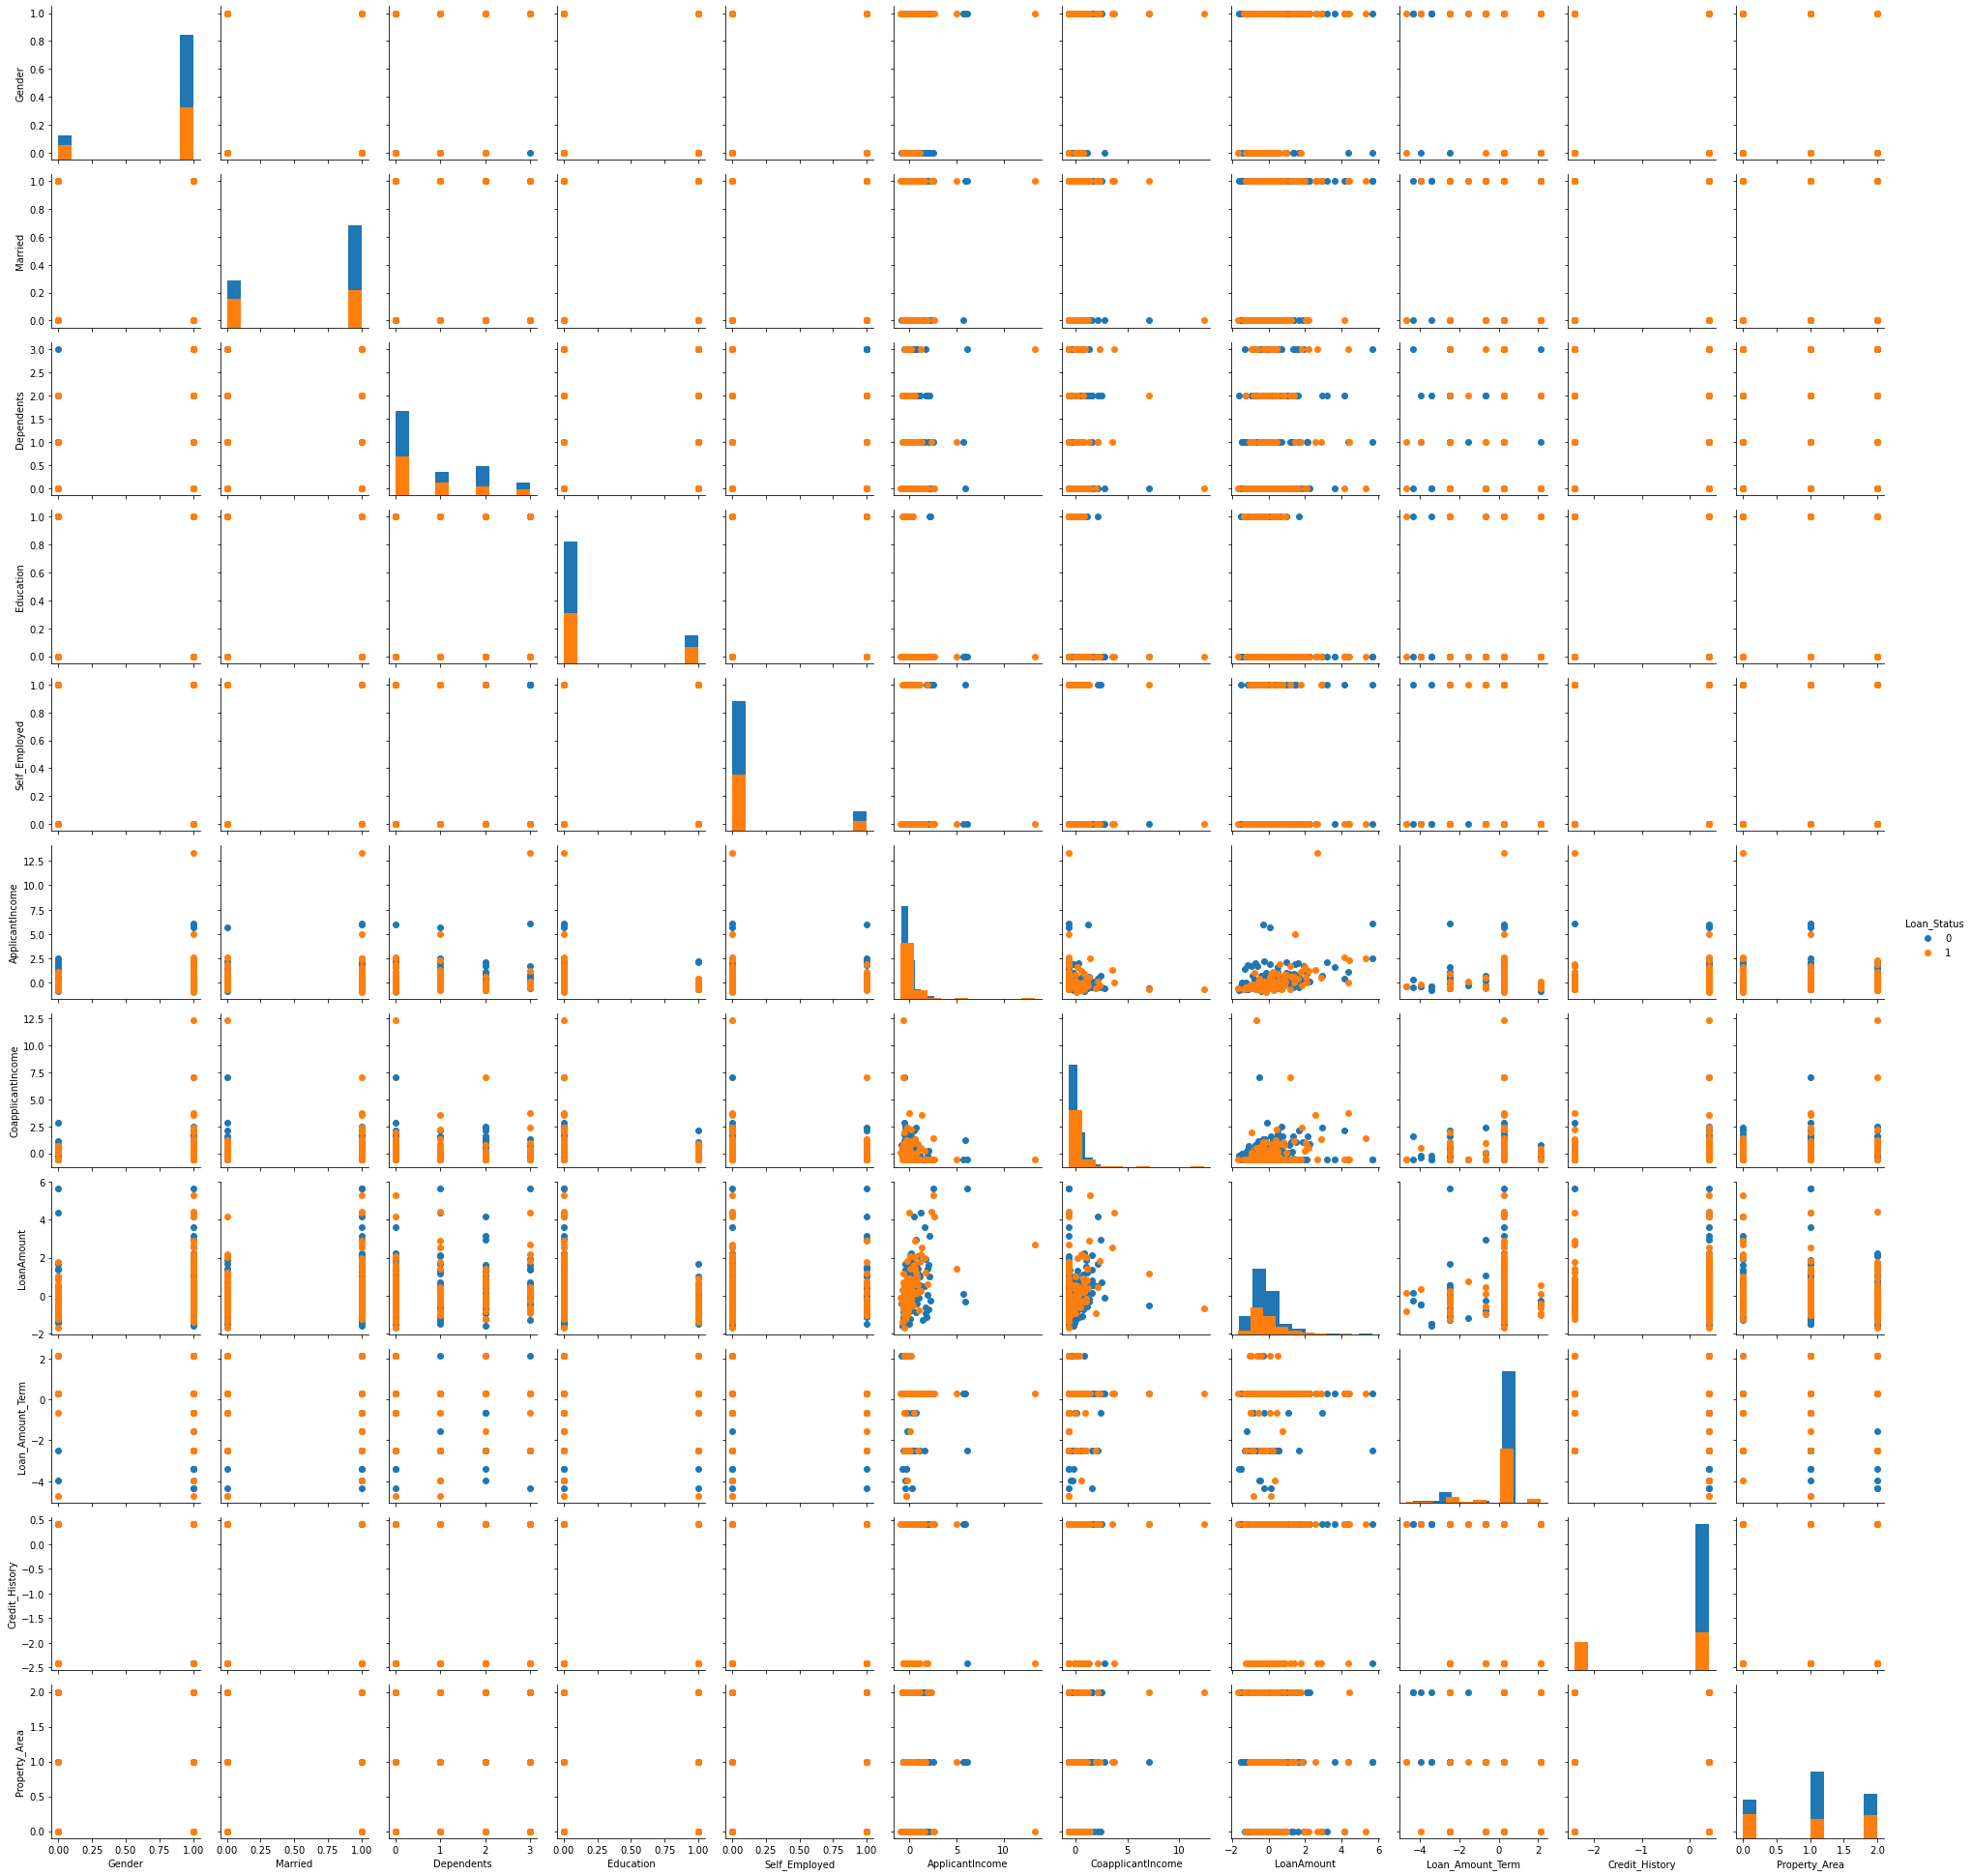

In [67]:
g = sns.PairGrid(df,hue="Loan_Status")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_rem, X_val, y_rem, y_val = train_test_split(X,Y, train_size=0.7, random_state=42, stratify= Y)

In [33]:

X_train, X_test, y_train, y_test = train_test_split(X_rem, y_rem, test_size=0.3, stratify= y_rem, random_state=42)

In [34]:
X_train.shape

(235, 11)

In [35]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
55,1,1,2,0,0,-0.469105,-0.158355,-0.593545,0.275542,0.413197,1
48,0,1,0,0,0,-0.480231,0.710873,-0.307562,0.275542,-2.420153,2
486,1,0,2,0,0,-0.320933,-0.604633,-0.804924,0.275542,-2.420153,0
398,1,0,0,1,0,-0.258238,0.032469,-0.444336,0.275542,0.413197,0
137,1,1,2,0,1,-0.361729,0.733818,-0.705452,0.275542,0.413197,2


In [36]:
X_test.shape

(101, 11)

In [37]:
y_train.describe()

count    235.000000
mean       0.310638
std        0.463743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Loan_Status, dtype: float64

# Prediktif

## 1. Regresi Logistic

In [38]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV

In [39]:
penalty = ['l2']
tol = [0.001, 0.0001, 0.00001]
C = [100, 10, 1, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
intercept_scaling = [1, 0.75, 0.5, 0.25]
class_weight = ['balance', None]
solver = ['newton-cg','sag','lbfgs','saga']
max_iter = [15000]
param_distributions = dict(penalty=penalty, tol=tol, C=C,fit_intercept= fit_intercept, intercept_scaling=intercept_scaling,  class_weight=class_weight, solver = solver, max_iter=max_iter)

In [40]:
import time

logreg = LogisticRegression()
grid = RandomizedSearchCV( estimator=logreg,param_distributions=param_distributions, scoring = 'recall', cv = 3, n_jobs= -1 )

start_time = time.time()
grid_result = grid.fit(X_train,y_train)

# Summerize result
print("Best : %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time()- start_time)) + ' s')

Best : 0.519444 using {'tol': 0.001, 'solver': 'saga', 'penalty': 'l2', 'max_iter': 15000, 'intercept_scaling': 0.25, 'fit_intercept': True, 'class_weight': None, 'C': 10}
Execution time: 2.6483957767486572 s


In [41]:
y_pred = grid.predict(X_train)

In [42]:
from sklearn import metrics
print("Accuraxy:", metrics.accuracy_score(y_train, y_pred))
print("Precision:", metrics.precision_score(y_train, y_pred))
print("Recall:", metrics.recall_score(y_train, y_pred))
print("f1 Score:",metrics.f1_score(y_train,y_pred))
metrics.completeness_score

Accuraxy: 0.825531914893617
Precision: 0.8636363636363636
Recall: 0.5205479452054794
f1 Score: 0.6495726495726495


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [43]:
y_pred = grid.predict(X_test)

In [44]:
from sklearn import metrics
print("Accuraxy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("f1 Score:",metrics.f1_score(y_test,y_pred))
metrics.completeness_score

Accuraxy: 0.8217821782178217
Precision: 1.0
Recall: 0.41935483870967744
f1 Score: 0.5909090909090909


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [45]:
y_pred = grid.predict(X_val)

In [46]:
from sklearn import metrics
print("Accuraxy:", metrics.accuracy_score(y_val, y_pred))
print("Precision:", metrics.precision_score(y_val, y_pred))
print("Recall:", metrics.recall_score(y_val, y_pred))
print("f1 Score:",metrics.f1_score(y_val,y_pred))
metrics.completeness_score

Accuraxy: 0.7708333333333334
Precision: 0.72
Recall: 0.4090909090909091
f1 Score: 0.5217391304347826


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

## 2. Random Forest - Recall

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
from sklearn.datasets import make_classification

In [49]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [50]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [51]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier()
grid2 =  RandomizedSearchCV( estimator=RFclf,param_distributions=param_grid, scoring = 'recall', cv = 3, n_jobs= -1 )

start_time = time.time()
grid_result = grid2.fit(X_train,y_train)

# Summerize result
print("Best : %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time()- start_time)) + ' s')

Best : 0.477222 using {'n_estimators': 56, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': False}
Execution time: 0.4679262638092041 s


In [52]:
y_pred = grid2.predict(X_train)

In [53]:
from sklearn import metrics
print("Accuraxy:", metrics.accuracy_score(y_train, y_pred))
print("Precision:", metrics.precision_score(y_train, y_pred))
print("Recall:", metrics.recall_score(y_train, y_pred))
print("f1 Score:",metrics.f1_score(y_train,y_pred))
metrics.completeness_score

Accuraxy: 0.8595744680851064
Precision: 0.9761904761904762
Recall: 0.5616438356164384
f1 Score: 0.7130434782608696


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [54]:
y_pred = grid2.predict(X_test)

In [55]:
from sklearn import metrics
print("Accuraxy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("f1 Score:",metrics.f1_score(y_test,y_pred))
metrics.completeness_score

Accuraxy: 0.8118811881188119
Precision: 0.9285714285714286
Recall: 0.41935483870967744
f1 Score: 0.5777777777777778


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [56]:
y_pred = grid2.predict(X_val)

In [58]:
from sklearn import metrics
print("Accuraxy:", metrics.accuracy_score(y_val, y_pred))
print("Precision:", metrics.precision_score(y_val, y_pred))
print("Recall:", metrics.recall_score(y_val, y_pred))
print("f1 Score:",metrics.f1_score(y_val,y_pred))
metrics.completeness_score

Accuraxy: 0.7777777777777778
Precision: 0.75
Recall: 0.4090909090909091
f1 Score: 0.5294117647058824


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

## 3. Random Forest - F1 Score

In [59]:
## menggunakan f1 Score
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier()
grid3 =  RandomizedSearchCV( estimator=RFclf,param_distributions=param_grid, scoring = 'f1', cv = 3, n_jobs= -1 )

start_time = time.time()
grid_result = grid3.fit(X_train,y_train)

# Summerize result
print("Best : %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time()- start_time)) + ' s')

Best : 0.666363 using {'n_estimators': 17, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': False}
Execution time: 0.23966073989868164 s


In [60]:
y_pred = grid3.predict(X_train)

In [61]:
from sklearn import metrics
print("Accuraxy:", metrics.accuracy_score(y_train, y_pred))
print("Precision:", metrics.precision_score(y_train, y_pred))
print("Recall:", metrics.recall_score(y_train, y_pred))
print("f1 Score:",metrics.f1_score(y_train,y_pred))
metrics.completeness_score

Accuraxy: 0.851063829787234
Precision: 0.9523809523809523
Recall: 0.547945205479452
f1 Score: 0.6956521739130435


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [62]:
y_pred = grid3.predict(X_test)

In [63]:
from sklearn import metrics
print("Accuraxy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("f1 Score:",metrics.f1_score(y_test,y_pred))
metrics.completeness_score

Accuraxy: 0.801980198019802
Precision: 0.8666666666666667
Recall: 0.41935483870967744
f1 Score: 0.5652173913043478


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

In [64]:
y_pred = grid3.predict(X_val)

In [65]:
from sklearn import metrics
print("Accuraxy:", metrics.accuracy_score(y_val, y_pred))
print("Precision:", metrics.precision_score(y_val, y_pred))
print("Recall:", metrics.recall_score(y_val, y_pred))
print("f1 Score:",metrics.f1_score(y_val,y_pred))
metrics.completeness_score

Accuraxy: 0.7847222222222222
Precision: 0.782608695652174
Recall: 0.4090909090909091
f1 Score: 0.537313432835821


<function sklearn.metrics.cluster._supervised.completeness_score(labels_true, labels_pred)>

#  Kesimpulan

DESKRIPTIF:
1. Terdapat 480 data calon debitur yang nantinya akan dianalisa
2. Dari 480 orang tersebut, sebanyak 68% (332 orang) ajuan kreditnya ditermia (Loan Status = Yes) sedangkan sisanya ditolak
3. Pada data ada 80% calon debitur memiliki edukasi 'Graduate'
4. Sebanyak 65% calon debitur sudah menikah dan 82%nya adalah laki-laki

DIAGNOSTIC:
1. Korelasi antara variabel independen kelas kategori menunjukan bahwa, hasil korelasi menggunakan metode "Kendall" tidak ada variabel yang memiliki korelasi yang tinggi antar variabel independennya
2. Korelasi antara variabel independen kelas numerik menunjukan bahwa, hasil korelasi menggunakan metode "Pearson" tidak ada variabel yang memiliki korelasi yang tinggi antar variabel independennya
3. Korelasi antara variabel independen kelas kategori&numeruk menunjukan bahwa, hasil korelasi menggunakan metode "Spearman" tidak ada variabel yang memiliki korelasi yang tinggi antar variabel independennya
4. Tidak ada variabel independen yang dikeluarkan dalam analisis ini
5. Sebelum dilakukannya analisa prediktif, data dilakukan standardisasi skala dan juga label encode, dimana y=Loan Status dan X= merupakan variabel lainnya
6. Untuk variabel "Loan Status" Yes = 0, No = 1

PREDIKTIF:
1. Hasil menggunakan regresi logistik menunjukan, bahwa nilai Recall pada data validasi adalah sebesar 40,9%
2. Hasil menggunakan random forest logistik menunjukan, bahwa nilai Recall pada data validasi adalah sebesar 40,9%
3. Hasil menggunakan regresi logistik menunjukan, bahwa nilai F1 Score pada data validasi adalah sebesar 52%
4. Hasil menggunakan random forest logistik menunjukan, bahwa nilai F1 Score pada data validasi adalah sebesar 53%